# Decision Tree

### <span style='color:yellow'>Selecting the best ML model is attributed to the nature of the dataset itself including the distribution of the data samples and noise.</span>

### <span style='color:yellow'> If the data classes are well separated and one fitting line can separate the datasets, then the traditional ML models such as logistic regression and SVM are utilized.</span>

<img src='one_decision_line.PNG' width=280 style="margin:auto"/>


### <span style='color:yellow'>The main idea of the decision tree is to build a tree that splits the dataset (samples) such that the model gives the best separation respecting the number of classes. </span>

<img src=decision_tree.PNG width=280 style="margin:auto" />

### <span style='color:yellow'> The decision tree is considered the foundation and the basis of the random forest model.</span>


## Example:
### <span style='color:yellow'>Predicting if an individual takes the bus or he walks to the work.</span>

<img src='walk_example.PNG' width=150 style='margin:auto'>

### <span style='color:yellow'>In the above table, 10 samples with 2 different feature vectors represent the dataset for predicting the individual movement to the work.</span>

### <span style='color:yellow'>We can build a tree that is able to split the data into two groups by inserting all data samples into the root node as an initial step.</span>

### <span style='color:yellow'>According to the above table, the best feature vector that splits the data into two groups entitled "Rain", where it gives the highest information gain. Thus the splitting is initiated from the Rain column into two groups, i.e., left and right.</span>

<img src='tree.png' width=250  style="margin:auto"/>

### <span style='color:yellow'>Remember: the algorithm requires 
 a greedy search among all feature vectors and their values (values=thresholds) to select the best feature vector and the best threshold to split that vector based on the highest information gain. </span>




### <span style='color:yellow'>We can retrieve the most common label after the first split, but practically we do some measurements to ensure that we reached the best depth of the tree.</span>


### <span style='color:yellow'>The entropy, E, measures the randomness (or impurity) in the dataset and it is used to measure the uncertainty in the ML models (high entropy=high uncertainty).</span>

### <span style='color:yellow'>The entropy is equal to 1 at the root node (because of the high randomness), then it is minimized in the leaf node, and vice versa for the information gain, IG. </span>



## Entropy (E):
 $$
 \Large E =  - \Sigma P(x).\mathrm{log}_2(P(x))
 $$
 
 
$$
\Large{P(x)= \frac{\#x}{n}}
$$

### <span style='color:yellow'> In the above equation, we use the base-2 (base bit) because we want to measure the entropy in bits. This is just a convention, some people use base-e (nats) instead (nats instead of bits).</span>

### <span style='color:yellow'> Remember: we use the class labels to calulate the entropy.</span>
### <span style='color:yellow'> Calculating the entropy for the above table:</span>


$$
\Large{\mathrm{Node}=[0,0,0,0,0,1,1,1,1,1]}
$$


$$
\Large{\mathrm{E}=-[\frac{5}{10}.\mathrm{log}_2(\frac{5}{10})] - [\frac{5}{10}.\mathrm{log}_2(\frac{5}{10})] =1}
$$

### <span style='color:yellow'>The above entropy = 1, i.e., high randomness and the prediction is impossible at that node.</span>

### <span style='color:yellow'>After each split, the entropy for each node and the information gain are calculated for each child node.</span>


## Information gain (IG):

### <span style='color:yellow' >The information gain shows how much information we gained from the current split.</span>

$$
\Large{\mathrm{IG}=E(\mathrm{root \,\,node})- [\mathrm{weighted\,\,avg}*E(\mathrm{children})]}
$$


### <span style='color:yellow' >Calculating the IG for the above table after the first split:</span>

$$
\large{\mathrm{Node}=[0,0,0,0,0,1,1,1,1,1]}   \\ \large{\mathrm{Left}=[0,0,1,1,1,1,1]}   \\\large{\mathrm{Right}=[0,0,0]}   
$$


$$
\large{\mathrm{IG}}=E(\mathrm{Node})- [\frac{7}{10}*E(\mathrm{Left}) + \frac{3}{10}*E(\mathrm{Right})]
$$


$$
\large{\mathrm{IG}}=E(\mathrm{Node})- [\frac{7}{10}*0.863) + \frac{3}{10}*0)]=0.395
$$



# Model training:= build the tree
### <span style='color:yellow' >1- Select a random subset of feature vectors and put them in a root node to build the tree: usually we use all feature vectors but if the vectors are too big, we can pick a random subset of them (from this concept the random forest its name).</span>

### <span style='color:yellow' >2- Select the index of the best feature vector and impose it as spletting feature point: the best index of the feature vector is identified based on the information gain and the best-splitting threshold. That is by using the greedy search among all used vectors and thresholds (the unique values of the vector).</span>

### <span style='color:yellow' >3- Each node (left, right, or root) is represented by a python class object, thus we can save the best feature index;  splitting_threshold (the value  among the whole data samples ,i.e. X[:,feat_idx][idx_thershold], that makes data into groups); and the information of the left and right nodes.</span>

### <span style='color:yellow' >4- To avoid the overfitting, i.e., growing the tree too much, we apply some stopping criteria (such as max_depth, minimum samples for split=2, or the number of unique labels=1) to stop growing the tree: consider that the tree is built based on the recursion and the stopping criteria are mandatory.  </span> 

### <span style='color:yellow' >5- Finally, after applying the stopping criteria, we can retrieve the most common class label in that node and the same python object of the node is returned to store the value of the most common label together with the best threshold, features, left, and right information.</span>

# Model prediction := traverse tree
### <span style='color:yellow' >1- Treverse the nodes of the tree recursively.</span>
### <span style='color:yellow' >2- Check if the first node is the root node, if true then return the label stored in that node.</span>

### <span style='color:yellow' >3-  Check the index of a best-split feature that is already stored at each node (after training) of the test sample, then compare the value of that feature index with the best-splitting threshold stored in that node (Left:= x[feature index$<=$threshold], else right) then go to the left or the right node.</span>
### <span style='color:yellow' >4- Reaching to any of the stopping criteria entails reaching the leaf node from which we retrieve the most common label (prediction) stored in that node .</span>



In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [4]:
'Importing the relevant libraries'
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

'Importing the relevant libraries'

In [5]:
'Dataset'
dataset=load_breast_cancer()
dataset.keys()
X,y=dataset.data , dataset.target
X.shape
y.shape
dataset.target_names

'Dataset'

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

(569, 30)

(569,)

array(['malignant', 'benign'], dtype='<U9')

In [6]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,shuffle=True,random_state=1234)
X_train.shape
X_test.shape


(455, 30)

(114, 30)

'Visualizing the first two feature vectors'

Text(0.5, 1.0, 'The first two feature vectors')

Text(0.5, 0, 'X_1')

Text(0, 0.5, 'y_1')

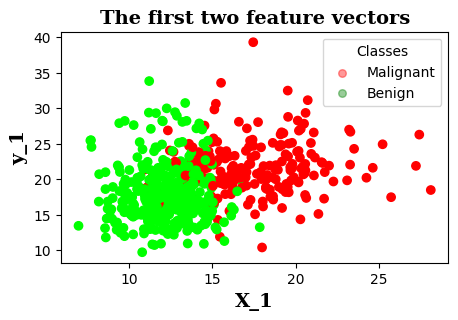

In [7]:
'Visualizing the first two feature vectors'
font1 = {'family':'serif','weight':'bold','color':'black','size':14}
cmap=ListedColormap(['#FF0000','#00FF00'])
fig,ax=plt.subplots(1,figsize=(5,3))
ax.scatter(X[:,0],X[:,1],c=y,cmap=cmap)
plt.title('The first two feature vectors',fontdict=font1)
plt.xlabel('X_1',fontdict=font1)
plt.ylabel('y_1',fontdict=font1)
for tag in ['Malignant', 'Benign']:
    plt.scatter([], [], c= 'r' if tag == 'Malignant' else 'g'  , alpha=0.4, s=30,
                label=tag)
plt.legend(scatterpoints=1, frameon=True, labelspacing=0.5, title='Classes')

plt.show()



In [6]:
'Building the decision tree blueprint'
import numpy as np
from collections import Counter

'1- We need to build two separated classes: the first one stores information at each node'
'We need teh following class to return a python object at each node'
class Node:
    def __init__(self,best_feature_idx=None,best_threshold=None,left_node=None,right_node=None,*,label_value=None):    
        self.best_feature_idx=best_feature_idx
        self.best_threshold=best_threshold
        self.Left_node=left_node
        self.right_node=right_node 
        self.label_value=label_value # This is a keyword argument because the node is a leaf we return the Node object by passing this value
        
        # Check if the node is a leaf node or not
        def is_leaf(self):
            return self.label_value is not None # Not a leaf value if no value

'Building the decision tree blueprint'

'1- We need to build two separated classes: the first one stores information at each node'

'We need teh following class to return a python object at each node'

In [7]:
'2- The second class is teh actual decision tree class'

class DecisionTree:
    # identifying the min sample for splitting and the # of feature points in teh feature vector for training
    def __init__(self,min_samples_for_splitting=2,max_depth=100,n_feats=None):
        self.min_samples_for_splitting=min_samples_for_splitting
        self.max_depth=max_depth
        self.n_feats=n_feats
        self.root_node=root_node
    

'2- The second class is teh actual decision tree class'

In [9]:
'Combining the both classes'
import numpy as np
from collections import Counter

class Node:
    def __init__(self,best_feature_idx=None,best_threshold=None,left_node=None,right_node=None,*,label_value=None):    
        self.best_feature_idx=best_feature_idx
        self.best_threshold=best_threshold
        self.Left_node=left_node
        self.right_node=right_node 
        self.label_value=label_value # This is a keyword argument because the node is a leaf we return the Node object by passing this value
        
        # Check if the node is a leaf node or not
        def is_leaf(self):
            return self.label_value is not None # Not a leaf value if no value
        
class DecisionTree:
    # identifying the min sample for splitting and the # of feature points in teh feature vector for training
    def __init__(self,min_samples_for_splitting=2,max_depth=100,n_feats=None):
        self.min_samples_for_splitting=min_samples_for_splitting
        self.max_depth=max_depth
        self.n_feats=n_feats
        self.root_node=root_node
            

'Combining the both classes'

In [10]:
'Building fit method'

import numpy as np
from collections import Counter

class Node:
    def __init__(self,best_feature_idx=None,best_threshold=None,left_node=None,right_node=None,*,label_value=None):    
        self.best_feature_idx=best_feature_idx
        self.best_threshold=best_threshold
        self.Left_node=left_node
        self.right_node=right_node 
        self.label_value=label_value # This is a keyword argument because the node is a leaf we return the Node object by passing this value
        
        # Check if the node is a leaf node or not
        def is_leaf(self):
            return self.label_value is not None # Not a leaf value if no value
        
class DecisionTree:
    # identifying the min sample for splitting and the # of feature points in teh feature vector for training
    def __init__(self,min_samples_for_splitting=2,max_depth=100,n_feats=None):
        self.min_samples_for_splitting=min_samples_for_splitting
        self.max_depth=max_depth
        self.n_feats=n_feats
        self.root_node=root_node
            
    def fit(self,X,y):
        self.n_feats=X.shape[1] if not self.n_feats else min(self.n_feats,X.shape[1])
        self.root_node=self.graw_tree(X,y)
        
    def _grow_tree(self,X,y,depth=0):
        n_feats,n_samples=X.shape
        n_labels=len(np.unique(y))
        
        # Before growing check the stopping criteria for recursion
        if (n_labels==1
            or n_samples<self.min_samples_for_splitting
            or depth>self.max_depth):
            leaf_value=self._most_common_label(y)
            return Node(label_value=leaf_value)
    
    def _most_common_label(y):
        counter=Counter(y)
        most_common=counter.most_common(0)[0][0] # Slicing the first value ofa list of tuple
        
            
    
    
    
        
        
        
        
        
            

'Building fit method'

In [107]:
'Sampling indicies from the feature vectors and pick the best indx and best threshold'

import numpy as np
from collections import Counter

class Node:
    def __init__(self,best_feature_idx=None,best_threshold=None,left_node=None,right_node=None,*,label_value=None):    
        self.best_feature_idx=best_feature_idx
        self.best_threshold=best_threshold
        self.Left_node=left_node
        self.right_node=right_node 
        self.label_value=label_value # This is a keyword argument because the node is a leaf we return the Node object by passing this value
        
        # Check if the node is a leaf node or not
        def is_leaf(self):
            return self.label_value is not None # Not a leaf value if no value
        
class DecisionTree:
    # identifying the min sample for splitting and the # of feature points in teh feature vector for training
    def __init__(self,min_samples_for_splitting=2,max_depth=100,n_feats=None): # n_feats can be randomly sampled
        self.min_samples_for_splitting=min_samples_for_splitting
        self.max_depth=max_depth
        self.n_feats=n_feats
        self.root_node=root_node
            
    def fit(self,X,y):
        self.n_feats=X.shape[1] if not self.n_feats else min(self.n_feats,X.shape[1])
        self.root_node=self.grow_tree(X,y)
        
    def _grow_tree(self,X,y,depth=0):
        n_feats,n_samples=X.shape
        n_labels=len(np.unique(y))
        
        # Before growing check the stopping criteria for recursion
        if (n_labels==1
            or n_samples<self.min_samples_for_splitting
            or depth>self.max_depth):
            leaf_value=self._most_common_label(y)
            return Node(label_value=leaf_value)
        feat_idxs=np.random.choice(n_feats,self.n_feats,replace=True) # True to avoid picking the same index twice
        best_feature_idx,best_threshold=self._best_criteria(X,y,feat_idxs)
        
    def _best_criteria(X,y,feat_idxs):
        best_info_gain=-1
        best_feature_idx,best_threshold=None,None
        for idx in feat_idxs:
            X_c=X[idx]
            thresholds=np.unique(X_c)
            for threshold in thresholds:
                info_gain=self._info_gain(y,X_c,threshold)
                if info_gain > best_info_gain:
                    best_info_gain=info_gain
                    best_feature_idx=idx
                    best_threshold=threshold
            return best_feature_idx,best_threshold
    
    def _most_common_label(y):
        counter=Counter(y)
        most_common=counter.most_common(0)[0][0] # Slicing the first value ofa list of tuple

            

'Sampling indicies from the feature vectors and pick the best indx and best threshold'

In [11]:
' Calculting the entropy and information gain'
import numpy as np
from collections import Counter

class Node:
    def __init__(self,best_feature_idx=None,best_threshold=None,left_node=None,right_node=None,*,label_value=None):    
        self.best_feature_idx=best_feature_idx
        self.best_threshold=best_threshold
        self.Left_node=left_node
        self.right_node=right_node 
        self.label_value=label_value # This is a keyword argument because the node is a leaf we return the Node object by passing this value
        
        # Check if the node is a leaf node or not
        def is_leaf(self):
            return self.label_value is not None # Not a leaf value if no value
        
class DecisionTree:
    # identifying the min sample for splitting and the # of feature points in teh feature vector for training
    def __init__(self,min_samples_for_splitting=2,max_depth=100,n_feats=None): # n_feats can be randomly sampled
        self.min_samples_for_splitting=min_samples_for_splitting
        self.max_depth=max_depth
        self.n_feats=n_feats
        self.root_node=None
            
    def fit(self,X,y):
        self.n_feats=X.shape[1] if not self.n_feats else min(self.n_feats,X.shape[1])
        self.root_node=self.grow_tree(X,y)
        
    def _grow_tree(self,X,y,depth=0):
        n_feats,n_samples=X.shape
        n_labels=len(np.unique(y))
        
        # Before growing check the stopping criteria for recursion
        if (n_labels==1
            or n_samples<self.min_samples_for_splitting
            or depth>self.max_depth):
            leaf_value=self._most_common_label(y)
            return Node(label_value=leaf_value)
        feat_idxs=np.random.choice(n_feats,self.n_feats,replace=True) # True to avoid picking the same index twice
        best_feature_idx,best_threshold=self._best_criteria(X,y,feat_idxs)
        
    def _best_criteria(X,y,feat_idxs):
        best_info_gain=-1
        best_feature_idx,best_threshold=None,None
        for idx in feat_idxs:
            X_c=X[idx]
            thresholds=np.unique(X_c)
            for threshold in thresholds:
                info_gain=self._information_gain(y,X_c,threshold)
                if info_gain > best_info_gain:
                    best_info_gain=info_gain
                    best_feature_idx=idx
                    best_threshold=threshold
            return best_feature_idx,best_threshold
    
    def _information_gain(self,y,X_c,threshold):
        root_node_entropy=self._entropy(y)
        # left and right nodes entropy
        left_idxs,right_idxs=self._split(X_c,threshold)
        len_left=len(left_idxs)
        len_right=len(right_idxs)
        if len_left==0 or len_right==0:
            return 0
        
        entropy_left=self._entropy(y[left_idxs])
        entropy_right=self._entropy(y[right_idxs])
        # child weighted  entropy
        child_entropy= (len_left/len(y))*entropy_left +(len_right/len(y))*entropy_right
        
        info_gain=root_node_entropy-child_entropy
        return info_gain
        
    def _split(self,X_c,threshold):
        left_idxs=np.argwhere(X_c<=threshold).flatten()
        right_idxs=np.argwhere(X_c>threshold).flatten()
        return left_idxs ,right_idxs
        
    def _entropy(self,y):
        hist=np.bincount(y)
        ps=hist/len(y)
        return - np.sum([p*np.log2(p) for p in ps if p > 0]) # the log is indefined for 0
        
        
    
    def _most_common_label(y):
        counter=Counter(y)
        most_common=counter.most_common(0)[0][0] # Slicing the first value ofa list of tuple

            

' Calculting the entropy and information gain'

In [120]:
'continue with _grow_tree method by splitting the data and obtain the left and right node recursively'
import numpy as np
from collections import Counter

class Node:
    def __init__(self,best_feature_idx=None,best_threshold=None,left_node=None,right_node=None,*,label_value=None):    
        self.best_feature_idx=best_feature_idx
        self.best_threshold=best_threshold
        self.Left_node=left_node
        self.right_node=right_node 
        self.label_value=label_value # This is a keyword argument because the node is a leaf we return the Node object by passing this value
        
        # Check if the node is a leaf node or not
        def is_leaf(self):
            return self.label_value is not None # Not a leaf value if no value
        
class DecisionTree:
    # identifying the min sample for splitting and the # of feature points in teh feature vector for training
    def __init__(self,min_samples_for_splitting=2,max_depth=100,n_feats=None): # n_feats can be randomly sampled
        self.min_samples_for_splitting=min_samples_for_splitting
        self.max_depth=max_depth
        self.n_feats=n_feats
        self.root_node=None
            
    def fit(self,X,y):
        self.n_feats=X.shape[1] if not self.n_feats else min(self.n_feats,X.shape[1])
        self.root_node=self.grow_tree(X,y)
        
    def _grow_tree(self,X,y,depth=0):
        n_feats,n_samples=X.shape
        n_labels=len(np.unique(y))
        
        # Before growing check the stopping criteria for recursion
        if (n_labels==1
            or n_samples<self.min_samples_for_splitting
            or depth>self.max_depth):
            leaf_value=self._most_common_label(y)
            return Node(label_value=leaf_value)
        feat_idxs=np.random.choice(n_feats,self.n_feats,replace=True) # True to avoid picking the same index twice
        best_feature_idx,best_threshold=self._best_criteria(X,y,feat_idxs)
        left_idxs,right_idxs=self._split(X[:,best_feature_idx],best_threshold)
        left_node=self.grow_tree(X[left_idxs,:],y[left_idxs],depth+1)
        right_node=self.grow_tree(X[right_idxs,:],y[right_idxs],depth+1)
        return Node(best_feature_idx=best_feature_idx,best_threshold=best_threshold,left_node=left_node,right_node=right_node)
            # We do not add the leaf value at this node object till reaching the leaf node (see above)
        
        
    def _best_criteria(X,y,feat_idxs):
        best_info_gain=-1
        best_feature_idx,best_threshold=None,None
        for idx in feat_idxs:
            X_c=X[idx]
            thresholds=np.unique(X_c)
            for threshold in thresholds:
                info_gain=self._information_gain(y,X_c,threshold)
                if info_gain > best_info_gain:
                    best_info_gain=info_gain
                    best_feature_idx=idx
                    best_threshold=threshold
            return best_feature_idx,best_threshold
    
    def _information_gain(self,y,X_c,threshold):
        root_node_entropy=self._entropy(y)
        # left and right nodes entropy
        left_idxs,right_idxs=self._split(X_c,threshold)
        len_left=len(left_idxs)
        len_right=len(right_idxs)
        if len_left==0 or len_right==0:
            return 0
        
        entropy_left=self._entropy(y[left_idxs])
        entropy_right=self._entropy(y[right_idxs])
        # child weighted  entropy
        child_entropy= (len_left/len(y))*entropy_left +(len_right/len(y))*entropy_right
        
        info_gain=root_node_entropy-child_entropy
        return info_gain
        
    def _split(self,X_c,threshold):
        left_idxs=np.argwhere(X_c<=threshold).flatten()
        right_idxs=np.argwhere(X_c>threshold).flatten()
        return left_idxs ,right_idxs
        
    def _entropy(self,y):
        hist=np.bincount(y)
        ps=hist/len(y)
        return - np.sum([p*np.log2(p) for p in ps if p > 0]) # the log is indefined for 0
        
        
    
    def _most_common_label(y):
        counter=Counter(y)
        most_common=counter.most_common(0)[0][0] # Slicing the first value ofa list of tuple

            

'continue with _grow_tree method by splitting the data and obtain the left and right node recursively'

In [43]:
'Building predict method'
import numpy as np
from collections import Counter

class Node:
    def __init__(self,best_feature_idx=None,best_threshold=None,left_node=None,right_node=None,*,label_value=None):    
        self.best_feature_idx=best_feature_idx
        self.best_threshold=best_threshold
        self.left_node=left_node
        self.right_node=right_node 
        self.label_value=label_value # This is a keyword argument because the node is a leaf we return the Node object by passing this value
        
        # Check if the node is a leaf node or not
    def is_leaf(self):
        return self.label_value is not None # Not a leaf value if no value
        
class DecisionTree:
    # identifying the min sample for splitting and the # of feature points in teh feature vector for training
    def __init__(self,min_samples_for_splitting=2,max_depth=100,n_feats=None): # n_feats can be randomly sampled
        self.min_samples_for_splitting=min_samples_for_splitting
        self.max_depth=max_depth
        self.n_feats=n_feats
        self.root_node=None
            
    def fit(self,X,y):
        self.n_feats=X.shape[1] if not self.n_feats else min(self.n_feats,X.shape[1])
        self.root_node=self._grow_tree(X,y) # at the end root_node will be a python class object
        
    def _grow_tree(self,X,y,depth=0):
        n_samples,n_features=X.shape
        n_labels=len(np.unique(y))
        
        # Before growing check the stopping criteria for recursion
        if (n_labels==1
            or n_samples<self.min_samples_for_splitting
            or depth>= self.max_depth):
            leaf_value=self._most_common_label(y)
            return Node(label_value=leaf_value)
        feat_idxs=np.random.choice(n_features,self.n_feats,replace=False) # True to avoid picking the same index twice
        best_feature_idx,best_threshold=self._best_criteria(X,y,feat_idxs)
        left_idxs,right_idxs=self._split(X[:,best_feature_idx],best_threshold)
        left_node=self._grow_tree(X[left_idxs,:],y[left_idxs],depth+1)
        right_node=self._grow_tree(X[right_idxs,:],y[right_idxs],depth+1)
        return Node(best_feature_idx=best_feature_idx,best_threshold=best_threshold,left_node=left_node,right_node=right_node)
            # We do not add the leaf value at this node object till reaching the leaf node (see above)
        
        
    def _best_criteria(self,X,y,feat_idxs):
        best_info_gain=-1
        best_feature_idx,best_threshold=None,None
        for idx in feat_idxs:
            X_c=X[:,idx]
            thresholds=np.unique(X_c)
            for threshold in thresholds:
                info_gain=self._information_gain(y,X_c,threshold)
                if info_gain > best_info_gain:
                    best_info_gain=info_gain
                    best_feature_idx=idx
                    best_threshold=threshold
            print (best_feature_idx,best_threshold)
        return best_feature_idx,best_threshold
    
    def _information_gain(self,y,X_c,threshold):
        root_node_entropy=self._entropy(y)
        # left and right nodes entropy
        left_idxs,right_idxs=self._split(X_c,threshold)
        len_left=len(left_idxs)
        len_right=len(right_idxs)
        if len_left==0 or len_right==0:
            return 0
        
        entropy_left=self._entropy(y[left_idxs])
        entropy_right=self._entropy(y[right_idxs])
        # child weighted  entropy
        child_entropy= (len_left/len(y))*entropy_left +(len_right/len(y))*entropy_right
        
        info_gain=root_node_entropy-child_entropy
        return info_gain
        
    def _split(self,X_c,threshold):
        left_idxs=np.argwhere(X_c<=threshold).flatten()
        right_idxs=np.argwhere(X_c>threshold).flatten()
        return left_idxs ,right_idxs
        
    def _entropy(self,y):
        hist=np.bincount(y)
        ps=hist/len(y)
        return - np.sum([p*np.log2(p) for p in ps if p > 0]) # the log is indefined for 0
        
    def _most_common_label(self,y):
        counter=Counter(y)
        most_common=counter.most_common(1)[0][0] # Slicing the first value ofa list of tuple
        return most_common


    def predict(self,X):
        return np.array([self._traverse_tree(x,self.root_node) for x in X])
    def _traverse_tree(self,x,node):
        if node.is_leaf():
            return node.label_value    
        print(node.best_threshold)
        if x[node.best_feature_idx] <= node.best_threshold:
            return self._traverse_tree(x,node.left_node)
        return self._traverse_tree(x,node.right_node)
        
        

'Building predict method'

In [45]:
clf=DecisionTree(max_depth=5)
pred=clf.fit(X_train,y_train)


1 18.61
1 18.61
23 880.8
23 880.8
23 880.8
23 880.8
23 880.8
23 880.8
23 880.8
23 880.8
23 880.8
23 880.8
23 880.8
23 880.8
23 880.8
23 880.8
23 880.8
23 880.8
23 880.8
23 880.8
23 880.8
23 880.8
23 880.8
23 880.8
7 0.04908
7 0.04908
7 0.04908
7 0.04908
7 0.04908
7 0.04908
10 0.3778
10 0.3778
10 0.3778
27 0.1105
23 880.8
23 880.8
23 880.8
23 880.8
23 880.8
23 880.8
23 880.8
23 880.8
23 880.8
23 880.8
23 880.8
23 880.8
23 880.8
23 880.8
23 880.8
23 880.8
23 880.8
23 880.8
23 880.8
20 16.77
20 16.77
20 16.77
20 16.77
20 16.77
20 16.77
20 16.77
2 74.87
20 13.35
20 13.35
20 13.35
20 13.35
20 13.35
20 13.35
20 13.35
21 30.04
21 30.04
21 30.04
21 30.04
21 30.04
21 30.04
21 30.04
21 30.04
21 30.04
21 30.04
21 30.04
21 30.04
21 30.04
21 30.04
21 30.04
21 30.04
21 30.04
21 30.04
21 30.04
21 30.04
21 30.04
21 30.04
8 0.1619
8 0.1619
12 3.926
12 3.926
12 3.926
12 3.926
12 3.926
12 3.926
12 3.926
12 3.926
12 3.926
12 3.926
12 3.926
12 3.926
12 3.926
12 3.926
12 3.926
12 3.926
12 3.926
12 3.926
12 

In [46]:
y_predicted=clf.predict(X_test)


0.04908
114.3
0.04908
114.3
25.47
1.513
0.04908
16.77
30.04
48.29
0.04908
16.77
30.04
48.29
0.04908
16.77
30.04
48.29
0.04908
16.77
30.04
48.29
0.04908
114.3
0.04908
114.3
25.47
0.07857
0.05069
0.04908
16.77
30.04
48.29
0.04908
114.3
0.04908
114.3
0.04908
16.77
30.04
48.29
0.04908
114.3
25.47
1.513
0.04908
16.77
30.04
48.29
0.04908
114.3
0.04908
16.77
30.04
48.29
0.04908
16.77
30.04
48.29
0.04908
114.3
25.47
1.513
0.04908
114.3
0.04908
16.77
30.04
48.29
0.04908
16.77
30.04
48.29
0.04908
16.77
30.04
48.29
0.04908
114.3
0.04908
16.77
30.04
48.29
0.04908
16.77
30.04
48.29
0.04908
114.3
0.04908
16.77
30.04
48.29
0.04908
16.77
30.04
48.29
0.04908
16.77
30.04
14.37
0.04908
114.3
0.04908
16.77
30.04
48.29
0.04908
16.77
30.04
14.37
0.04908
16.77
30.04
48.29
0.04908
16.77
30.04
48.29
0.04908
114.3
0.04908
114.3
0.04908
114.3
25.47
0.07857
0.04908
16.77
25.45
0.04908
16.77
30.04
48.29
0.04908
16.77
25.45
1.317
0.04908
16.77
30.04
14.37
86.18
0.04908
114.3
0.04908
16.77
30.04
48.29
0.04908
114.3


In [47]:
clf=DecisionTree(max_depth=5)
clf.fit(X_train,y_train)
y_predicted=clf.predict(X_test)
y_predicted

2 98.73
2 98.73
2 98.73
20 16.77
20 16.77
20 16.77
23 880.8
23 880.8
23 880.8
23 880.8
23 880.8
23 880.8
23 880.8
23 880.8
23 880.8
23 880.8
23 880.8
23 880.8
23 880.8
23 880.8
23 880.8
23 880.8
23 880.8
23 880.8
23 880.8
23 880.8
7 0.04908
7 0.04908
7 0.04908
7 0.04908
3 693.7
3 693.7
3 693.7
21 28.01
21 28.01
21 28.01
21 28.01
21 28.01
21 28.01
21 28.01
21 28.01
21 28.01
21 28.01
21 28.01
21 28.01
21 28.01
21 28.01
23 880.8
23 880.8
23 880.8
23 880.8
23 880.8
23 880.8
20 16.77
20 16.77
20 16.77
20 16.77
20 16.77
20 16.77
20 16.77
15 0.01202
11 1.805
22 85.09
22 85.09
22 85.09
22 85.09
22 85.09
22 85.09
22 85.09
22 85.09
22 85.09
23 553.0
21 30.04
21 30.04
21 30.04
21 30.04
21 30.04
21 30.04
21 30.04
21 30.04
21 30.04
21 30.04
21 30.04
21 30.04
21 30.04
21 30.04
21 30.04
21 30.04
21 30.04
21 30.04
17 0.01421
17 0.01421
17 0.01421
17 0.01421
17 0.01421
17 0.01421
17 0.01421
11 2.09
11 2.09
11 2.09
11 2.09
11 2.09
11 2.09
13 48.29
13 48.29
13 48.29
13 48.29
13 48.29
13 48.29
13 48.29
13

array([0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0])